In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

%matplotlib inline

In [3]:
train = pd.read_csv('C:/Users/rsk13/Desktop/CLTV/data_source/train_BRCpofr.csv')
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
train.drop(['id'], axis = 1, inplace = True)

### Stats on Gender and Area they live in 

In [5]:
train['gender'].value_counts()

gender
Male      50497
Female    38895
Name: count, dtype: int64

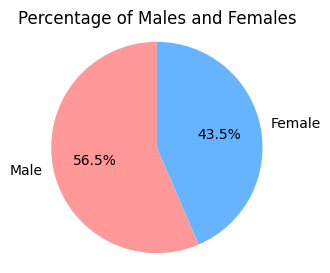

In [6]:
gender_counts = train['gender'].value_counts()
total_count = gender_counts.sum()
male_percentage = (gender_counts['Male'] / total_count) * 100
female_percentage = (gender_counts['Female'] / total_count) * 100

plt.figure(figsize=(3,3))
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
male = gender_counts['Male']
female = gender_counts['Female']

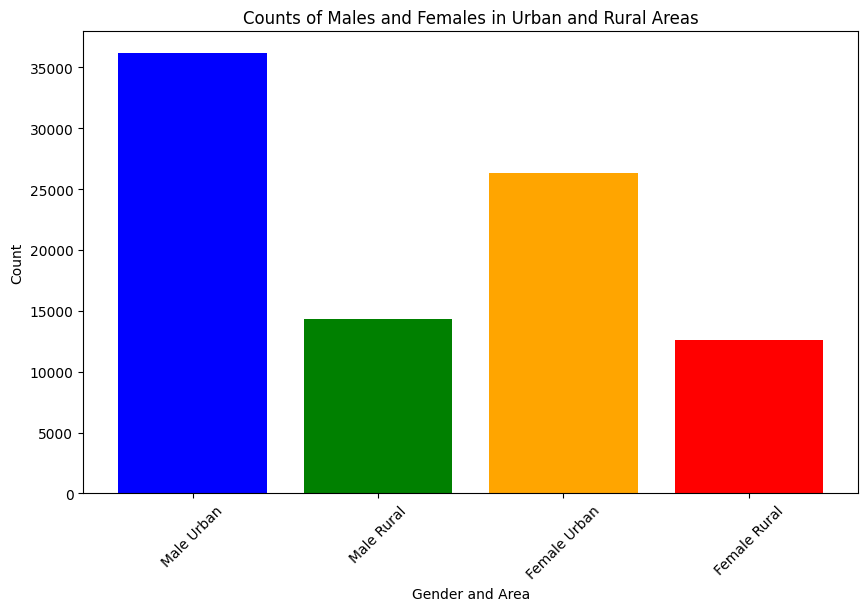

In [8]:
male_urban = train.loc[(train['gender'] == 'Male') & (train['area'] == 'Urban'), ['area']].value_counts()[0]
male_rural = train.loc[(train['gender'] == 'Male') & (train['area'] == 'Rural'), ['area']].value_counts()[0]

female_urban = train.loc[(train['gender'] == 'Female') & (train['area'] == 'Urban'), ['area']].value_counts()[0]
female_rural = train.loc[(train['gender'] == 'Female') & (train['area'] == 'Rural'), ['area']].value_counts()[0]

labels = ['Male Urban', 'Male Rural', 'Female Urban', 'Female Rural']
counts = [male_urban, male_rural, female_urban, female_rural]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Gender and Area')
plt.ylabel('Count')
plt.title('Counts of Males and Females in Urban and Rural Areas')
plt.xticks(rotation=45)
plt.show()

## <u>Observation and Inference</u> - 

### " __There is a higher proportion of males compared to females in both urban and rural areas.__"

-- So? --

1. <u>__*Potential Market Segmentation*__</u>: Recognizing gender differences can inform tailored marketing strategies and product offerings, potentially boosting CLTV by meeting specific customer needs.

2. <u>__*Risk Assessment and Underwriting*__</u>: Gender can influence risk assessment in insurance underwriting. By analyzing historical data, insurers can identify gender-specific risk factors and adjust underwriting criteria accordingly. This helps in mitigating risks and improving profitability.

3. <u>__*Customer Engagement and Retention*__</u>: Understanding customer gender distribution informs personalized engagement tactics for higher satisfaction and retention. Tailored communication, product recommendations, and support services aligned with predominant gender demographics boost loyalty and elevate CLTV.

4. <u>__*Diversification of Product Offerings*__</u>: Understanding gender distribution can shape new insurance products or customize existing ones to meet diverse customer needs. For instance, gender-specific plans catering to unique lifestyles or risks can attract more customers and boost CLTV by broadening offerings.

#### Average Claim amount in Urban and Rural

In [9]:
avg_claim_urban = train[train['area'] == 'Urban']['claim_amount'].mean()

avg_claim_rural = train[train['area'] == 'Rural']['claim_amount'].mean()

print('Average claim amount in - \nUrban areas : {:.2f}\nRural areas : {:.2f}'.format(avg_claim_urban, avg_claim_rural))

Average claim amount in - 
Urban areas : 5317.89
Rural areas : 2110.89


## <u>Observations and Inference</u>

### "__Average Claim amount is very higher in urban areas.__"

#### Potential reasons could be - <br>

1. <u>__*Cost of Living*__</u>: Urban areas often have higher living expenses, including healthcare costs, property values, and vehicle repair expenses, leading to higher claim amounts.

2. <u>__*Traffic Density*__</u>: Urban areas typically experience heavier traffic congestion, increasing the likelihood of accidents and resulting in higher claim amounts for vehicle insurance.

3. <u>__*Insurance Coverage*__</u>: Insurance policies in urban areas may offer broader coverage or higher policy limits to account for the increased risks and costs associated with urban living, resulting in higher claim amounts when incidents occur.

#### Qualification - Income Related?

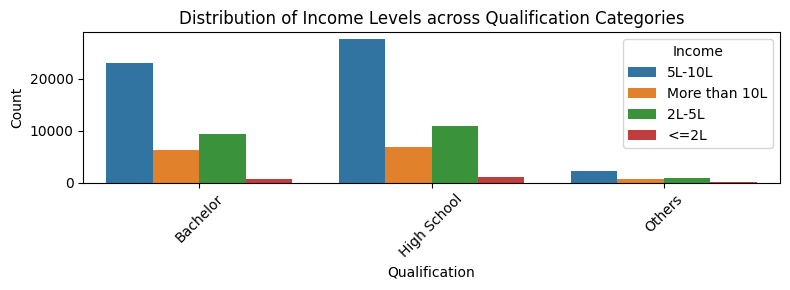

In [10]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8,3))
sns.countplot(data=train, x='qualification', hue='income', palette=custom_palette)
plt.title('Distribution of Income Levels across Qualification Categories')
plt.xlabel('Qualification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [11]:
# avg claim amount for each qualification category

avg_claim_qualification = train.groupby('qualification')['claim_amount'].mean().sort_values(ascending=False)
avg_claim_qualification

qualification
High School    4545.078146
Bachelor       4180.123226
Others         3764.175120
Name: claim_amount, dtype: float64

## <u>Observations and Inference - </u>

1. The majority of the population, regardless of the geographical area, falls within the income category of 5L-10L.

2. Among individuals with a high school qualification, the largest proportion earns between 5L-10L. Moreover, this group exhibits the highest average claim amount.

### Types of policy across different areas

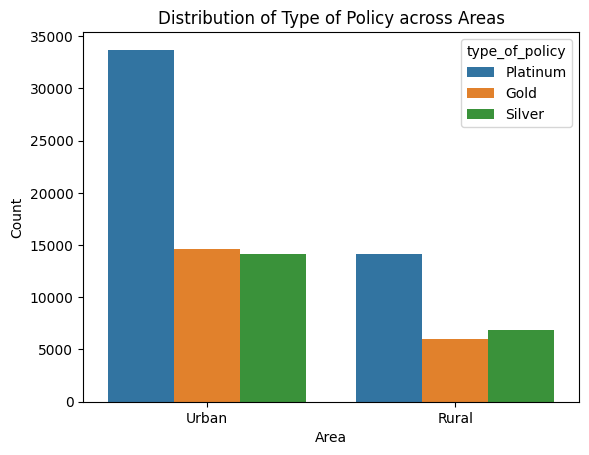

In [12]:
# Bar plot for Type of Policy across different Areas
sns.countplot(x='area', hue='type_of_policy', data=train)
plt.title('Distribution of Type of Policy across Areas')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

#### Income Vintage Relationship

In [13]:
train[['income', 'vintage',]]

,income,vintage
0,5L-10L,5
1,5L-10L,8
2,5L-10L,8
3,5L-10L,7
4,More than 10L,6
...,...,...
89387,More than 10L,6
89388,5L-10L,0
89389,5L-10L,4
89390,2L-5L,8


In [14]:
train['income'].value_counts()

income
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: count, dtype: int64

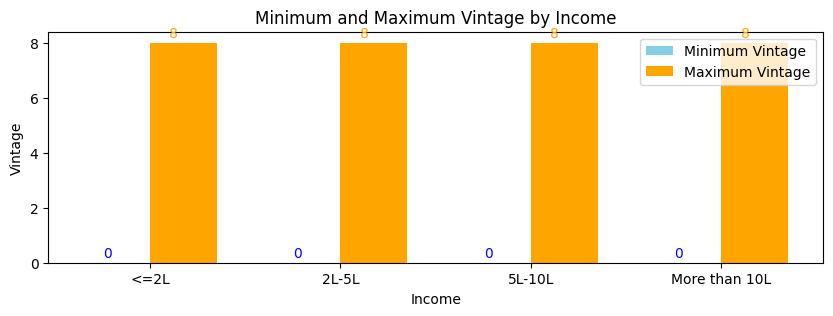

In [15]:
less_than_2_min = train.loc[train['income'] == '<=2L','vintage'].min()
less_than_2_max = train.loc[train['income'] == '<=2L','vintage'].max()

two_to_5_min = train.loc[train['income'] == '2L-5L','vintage'].min()
two_to_5_max = train.loc[train['income'] == '2L-5L','vintage'].max()

five_to_10_min = train.loc[train['income'] == '5L-10L','vintage'].min()
five_to_10_max = train.loc[train['income'] == '5L-10L','vintage'].max()

more_than_10_min = train.loc[train['income'] == 'More than 10L','vintage'].min()
more_than_10_max = train.loc[train['income'] == 'More than 10L','vintage'].max()


incomes = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']
min_values = [less_than_2_min, two_to_5_min, five_to_10_min, more_than_10_min]
max_values = [less_than_2_max, two_to_5_max, five_to_10_max, more_than_10_max]

bar_width = 0.35
r1 = np.arange(len(incomes))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10,3))
plt.bar(r1, min_values, color='skyblue', width=bar_width, label='Minimum Vintage')
plt.bar(r2, max_values, color='orange', width=bar_width, label='Maximum Vintage')

plt.xlabel('Income')
plt.ylabel('Vintage')
plt.title('Minimum and Maximum Vintage by Income')
plt.xticks([r + bar_width / 2 for r in range(len(incomes))], incomes)
plt.legend()

for i, (min_val, max_val) in enumerate(zip(min_values, max_values)):
    plt.text(i - 0.05, min_val + 0.1, str(min_val), ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(i + bar_width - 0.05, max_val + 0.1, str(max_val), ha='center', va='bottom', fontsize=10, color='orange')

plt.show()


#### Maximum vintage

In [16]:
train['vintage'].value_counts()

vintage
6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: count, dtype: int64

## <u>Observations and Inference - </u>

1. Across all income groups, the vintage levels exhibit consistency, with the highest and lowest vintage durations being identical with highest = 8 and lowest = 0.

2. The maximum vintage duration observed is 6 (years), indicating that individuals typically remain engaged with the business for a period ranging from 4 to 7 years.

3. As customers stay with the insurance company for extended periods, there's a chance to sell them more products or services. This could include suggesting additional insurance options or upgrading their current policies. By doing this, the company can boost how much each customer is worth over their lifetime and improve overall profits.

#### Martial Status and vintage relation?

In [17]:
single = train.loc[train['marital_status'] == 0, 'vintage']
single

1        8
3        7
7        0
10       4
11       6
        ..
89384    7
89387    6
89389    4
89390    8
89391    6
Name: vintage, Length: 37948, dtype: int64

In [18]:
correlation = train['marital_status'].corr(train['vintage'])
print("Correlation coefficient between marital status and vintage:", correlation)

Correlation coefficient between marital status and vintage: -0.011685515971515473


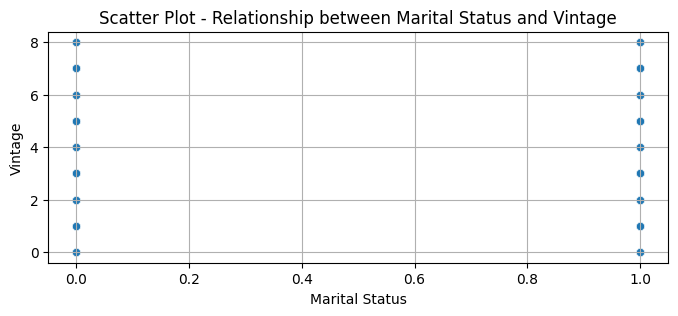

In [19]:
plt.figure(figsize=(8, 3))
plt.title('Scatter Plot - Relationship between Marital Status and Vintage')
sns.scatterplot(data=train, x='marital_status', y='vintage')
plt.xlabel('Marital Status')
plt.ylabel('Vintage')
plt.grid(True)
plt.show()

## <u>Observations and Inference - </u>

- **Investigation on Marital Status and Vintage Relationship:**
    - **Motivation for Investigation:**
        - Developed a hypothesis that marital status might influence a customer's engagement duration with the business.
        - The assumption was that married individuals might prioritize business engagements for the well-being and security of their families.
    - **Findings:**
        - After conducting the analysis, it was found that there is no significant correlation between marital status and vintage.
        - The investigation did not yield evidence to support the initial hypothesis.

#### Martial Status and Type of policy

In [20]:
train['type_of_policy'].value_counts()

type_of_policy
Platinum    47796
Silver      21010
Gold        20586
Name: count, dtype: int64

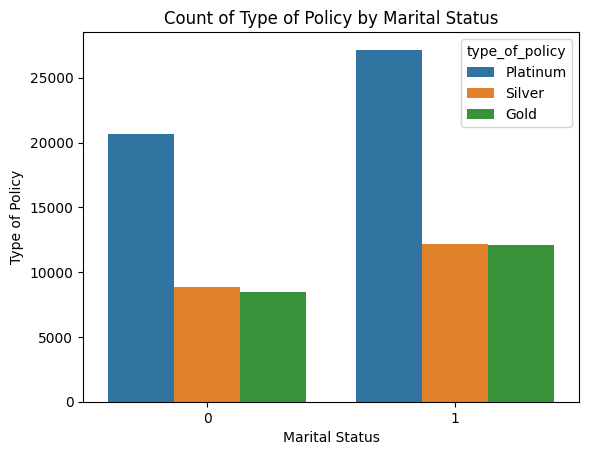

In [21]:
sns.countplot(x = 'marital_status', hue = 'type_of_policy', data = train)
plt.xlabel('Marital Status')
plt.ylabel('Type of Policy')
plt.title('Count of Type of Policy by Marital Status')
plt.show()

## <u>Observations and Inference - </u>

##### Despite the widespread preference for platinum policies across the population regardless of marital status, it is noteworthy that married individuals opt for silver and gold policies at nearly equivalent rates.

# STATISTICAL ANALYSIS OF VARIABLES

### ANOVA (Analysis of Variance)

If we want to compare the mean CLTV across different categorical variables (e.g., gender, area, qualification, etc.), we can conduct one-way ANOVA test.

- <u>If the mean CLTV is the same across all different categorical variables</u>, the observation/inference would be that there is no significant difference in the customer lifetime value (CLTV) among the various categories of the categorical variable. This suggests that the <u>CLTV is not influenced by the categorical variable under consideration.</u>

- <u>If the mean CLTV differs significantly across different categorical variables</u>, the observation/inference would be that there is a significant variation in the CLTV among the categories of the categorical variable. This indicates that the <u>categorical variable has an impact on the CLTV</u>, and there may be underlying factors associated with each category that influence the CLTV.

In [22]:
train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


### <u>Null Hypothesis (H0)</u>: The mean CLTV is the same across all categories of the categorical variable.

### <u>Alternative Hypothesis (H1)</u>: At least one category has a different mean CLTV compared to others.

##### Considering significance value (alpha) = 0.05

In [23]:
categorical_columns = train.select_dtypes(include=['object']).columns

# Dictionary to store ANOVA results
anova_results = {}

# for each categorical column
for column in categorical_columns:
    groups = [group[1] for group in train.groupby(column)['cltv']]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[column] = {'F-statistic': f_statistic, 'p-value': p_value}

# Displaying ANOVA results
for column, result in anova_results.items():
    print(f"ANOVA Test Results for {column}:")
    print(f"F-statistic: {result['F-statistic']}")
    print(f"p-value: {result['p-value']}")
    print()

ANOVA Test Results for gender:
F-statistic: 0.1552119399388717
p-value: 0.693604522475604

ANOVA Test Results for area:
F-statistic: 1612.3403505017125
p-value: 0.0

ANOVA Test Results for qualification:
F-statistic: 98.99276677439613
p-value: 1.1363927139220727e-43

ANOVA Test Results for income:
F-statistic: 186.77051836371825
p-value: 9.665251183824116e-121

ANOVA Test Results for num_policies:
F-statistic: 13345.072198127686
p-value: 0.0

ANOVA Test Results for policy:
F-statistic: 171.43391165436717
p-value: 4.893535365473623e-75

ANOVA Test Results for type_of_policy:
F-statistic: 50.686293268116536
p-value: 9.992979900289913e-23



### Observations - 

Here are the observations and inferences for each ANOVA test result with respect to every categorical variable:

### Gender:
- **Observation:** 
    - **F-statistic:** 0.1552
    - **p-value:** 0.6936
- **Inference:** 
    - The p-value is greater than the significance level (0.05), indicating that there is not significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>does not vary significantly across different gender categories.</u>

### Area:
- **Observation:** 
    - **F-statistic:** 1612.34
    - **p-value:** 0.0
- **Inference:** 
    - The p-value is less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different area categories.</u>

### Qualification:
- **Observation:** 
    - **F-statistic:** 98.9928
    - **p-value:** 1.1364e-43
- **Inference:** 
    - The p-value is much less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different qualification categories.</u>

### Income:
- **Observation:** 
    - **F-statistic:** 186.7705
    - **p-value:** 9.6653e-121
- **Inference:** 
    - The p-value is much less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different income categories.</u>

### Number of Policies:
- **Observation:** 
    - **F-statistic:** 13345.0722
    - **p-value:** 0.0
- **Inference:** 
    - The p-value is less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different numbers of policies</u>.

### Policy:
- **Observation:** 
    - **F-statistic:** 171.4339
    - **p-value:** 4.8935e-75
- **Inference:** 
    - The p-value is much less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different policy categories</u>.

### Type of Policy:
- **Observation:** 
    - **F-statistic:** 50.6863
    - **p-value:** 9.9930e-23
- **Inference:** 
    - The p-value is much less than the significance level (0.05), indicating that there is significant evidence to reject the null hypothesis. This suggests that the mean CLTV <u>varies significantly across different types of policy categories</u>.

### The analysis suggests that the customer lifetime value (CLTV) significantly varies across different demographic and policy-related categories, indicating potential areas for targeted marketing strategies and customer segmentation to maximize profitability.